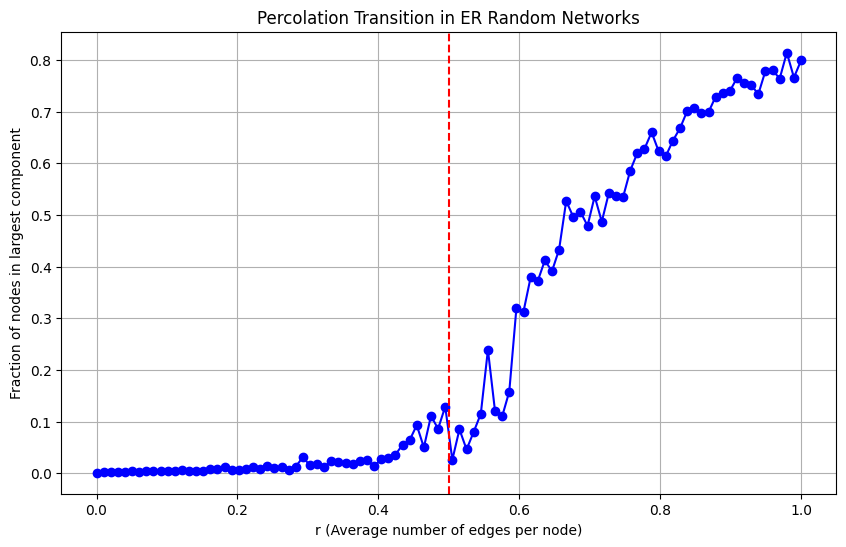

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the largest component size as a fraction of total nodes
def largest_component_fraction(graph):
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / graph.number_of_nodes()

# Number of nodes
n = 1000

# Range of r values
r_values = np.linspace(0, 1, 100)
largest_components = []

def bounded_size_rule_K1(n, m):
    G = nx.empty_graph(n)
    edges = list(nx.non_edges(G))
    np.random.shuffle(edges)

    for _ in range(m):
        if not edges:
            break
        e1 = edges.pop()
        if G.has_edge(*e1):
            continue

        component1 = nx.node_connected_component(G, e1[0])
        component2 = nx.node_connected_component(G, e1[1])

        if len(component1) == 1 and len(component2) == 1:
            G.add_edge(*e1)
        else:
            e2 = edges.pop()
            if not G.has_edge(*e2):
                G.add_edge(*e2)

    return G

# Generate ER graphs and calculate largest component size for each r
for r in r_values:
    # Number of edges
    m = int(r * n)
    # Create ER graph
    G = nx.gnm_random_graph(n, m)
    # Calculate largest component size fraction
    largest_components.append(largest_component_fraction(G))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, largest_components, marker='o', linestyle='-', color='b')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('Percolation Transition in ER Random Networks')
plt.xlabel('r (Average number of edges per node)')
plt.ylabel('Fraction of nodes in largest component')
plt.grid(True)
plt.show()


In [ ]:
def bounded_size_rule_K1(n, m):
    G = nx.empty_graph(n)
    edges = list(nx.non_edges(G))
    np.random.shuffle(edges)

    for _ in range(m):
        if not edges:
            break
        e1 = edges.pop()
        if G.has_edge(*e1):
            continue

        component1 = nx.node_connected_component(G, e1[0])
        component2 = nx.node_connected_component(G, e1[1])

        if len(component1) == 1 and len(component2) == 1:
            G.add_edge(*e1)
        else:
            e2 = edges.pop()
            if not G.has_edge(*e2):
                G.add_edge(*e2)

    return G


In [ ]:
r_values = np.linspace(0, 1, 100)
largest_components_bounded = []


# Generate graphs and calculate largest component size for each r
for r in r_values:
    m = int(r * n)

    G_bounded = bounded_size_rule_K1(n, m)
    largest_components_bounded.append(largest_component_fraction(G_bounded))



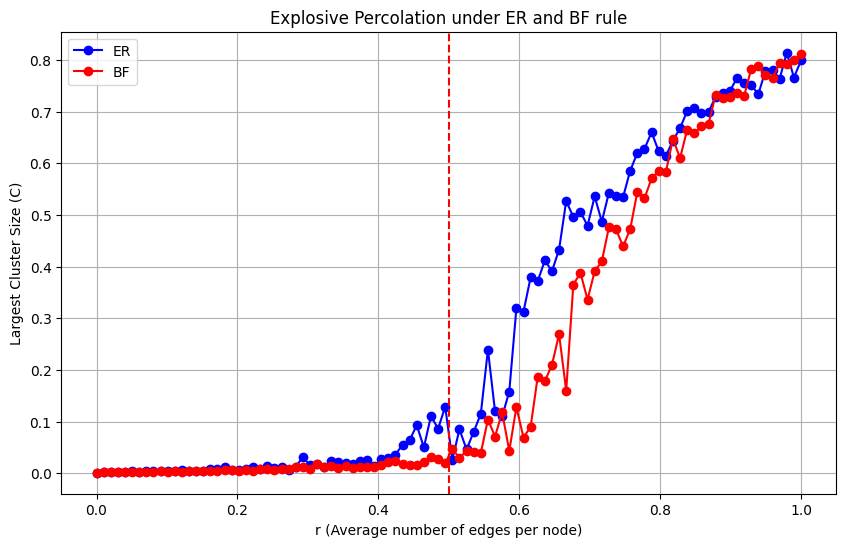

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(r_values, largest_components, marker='o', linestyle='-', color='b', label = 'ER')
plt.plot(r_values, largest_components_bounded, marker='o', linestyle='-', color='r', label = 'BF')

plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('Explosive Percolation under ER and BF rule')
plt.xlabel('r (Average number of edges per node)')
plt.ylabel('Largest Cluster Size (C)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def read_results(filename):
    r_values = []
    largest_components = []

    with open(filename, 'r') as f:
        next(f)  # Skip the header line
        for line in f:
            r, c = map(float, line.split())
            r_values.append(r)
            largest_components.append(c)

    return np.array(r_values), np.array(largest_components)

In [ ]:
r_values2, largest_components2 = read_results('results.txt')

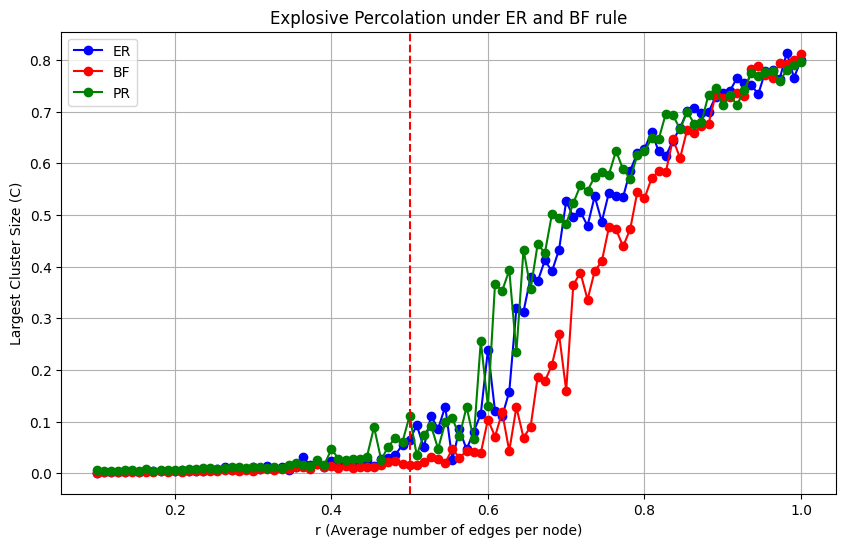

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(r_values2, largest_components, marker='o', linestyle='-', color='b', label = 'ER')
plt.plot(r_values2, largest_components_bounded, marker='o', linestyle='-', color='r', label = 'BF')
plt.plot(r_values2, largest_components2, marker='o', linestyle='-', color='g', label = 'PR')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title('Explosive Percolation under ER and BF rule')
plt.xlabel('r (Average number of edges per node)')
plt.ylabel('Largest Cluster Size (C)')
plt.legend()
plt.grid(True)
plt.show()